# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.09000000171363354
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from ddpg_agent import MultiAgent
from collections import deque
import torch

num_agents = 2
seed = 0
agents = MultiAgent(state_size=state_size, action_size=action_size, num_agents=2, random_seed=seed)

def ddpg(n_episodes=10000, print_every=10):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agents.reset()
        agent_score = np.zeros(num_agents)
        while True:
            actions = agents.act(states)                       # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent_score += env_info.rewards                         # update the score (for each agent)
            agents.step(
                states, actions, rewards, next_states, dones   # 
            )            
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
               
        scores_deque.append(np.max(agent_score))
        scores.append(np.max(agent_score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore Agent 1: {:.2f}\tScore Agent 2: {:.2f}'.format(
            i_episode, np.mean(scores_deque), agent_score[0], agent_score[1]), end="")

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=0.5 and i_episode > 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth') 
            break
    return scores

scores = ddpg()            

C:\Users\Ole\Miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 10	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 20	Average Score: 0.00	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 30	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 40	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 50	Average Score: 0.00	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 60	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 70	Average Score: 0.00	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 80	Average Score: 0.00	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 90	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 100	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 110	Average Score: 0.00	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 120	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 130	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 140	Average Score: 0.00	Score Agent 1: -0.01	Score A

Episode 1130	Average Score: 0.01	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 1140	Average Score: 0.02	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 1150	Average Score: 0.02	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 1160	Average Score: 0.02	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 1170	Average Score: 0.02	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 1180	Average Score: 0.02	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 1190	Average Score: 0.01	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 1200	Average Score: 0.01	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 1210	Average Score: 0.01	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 1220	Average Score: 0.01	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 1230	Average Score: 0.01	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 1240	Average Score: 0.00	Score Agent 1: -0.01	Score Agent 2: 0.00
Episode 1250	Average Score: 0.00	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 1260	Average Score: 0.00	Score

Episode 2230	Average Score: 0.12	Score Agent 1: 0.09	Score Agent 2: 0.200
Episode 2240	Average Score: 0.12	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 2250	Average Score: 0.13	Score Agent 1: 0.00	Score Agent 2: 0.091
Episode 2260	Average Score: 0.13	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 2270	Average Score: 0.13	Score Agent 1: 0.20	Score Agent 2: 0.091
Episode 2280	Average Score: 0.14	Score Agent 1: 0.10	Score Agent 2: 0.191
Episode 2290	Average Score: 0.13	Score Agent 1: 0.09	Score Agent 2: 0.200
Episode 2300	Average Score: 0.13	Score Agent 1: 0.10	Score Agent 2: 0.090
Episode 2310	Average Score: 0.13	Score Agent 1: 0.10	Score Agent 2: 0.091
Episode 2320	Average Score: 0.14	Score Agent 1: 0.09	Score Agent 2: 0.201
Episode 2330	Average Score: 0.14	Score Agent 1: 0.08	Score Agent 2: 0.101
Episode 2340	Average Score: 0.14	Score Agent 1: 0.00	Score Agent 2: 0.091
Episode 2350	Average Score: 0.14	Score Agent 1: 0.20	Score Agent 2: 0.190
Episode 2360	Average Score: 0.14	Score

Episode 3330	Average Score: 0.20	Score Agent 1: 0.40	Score Agent 2: 0.391
Episode 3340	Average Score: 0.21	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 3350	Average Score: 0.20	Score Agent 1: 0.09	Score Agent 2: 0.201
Episode 3360	Average Score: 0.18	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 3370	Average Score: 0.18	Score Agent 1: 0.09	Score Agent 2: 0.200
Episode 3380	Average Score: 0.20	Score Agent 1: 0.19	Score Agent 2: 0.100
Episode 3390	Average Score: 0.21	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 3400	Average Score: 0.20	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 3410	Average Score: 0.20	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 3420	Average Score: 0.21	Score Agent 1: 0.90	Score Agent 2: 1.091
Episode 3430	Average Score: 0.20	Score Agent 1: 0.20	Score Agent 2: 0.091
Episode 3440	Average Score: 0.19	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 3450	Average Score: 0.19	Score Agent 1: 0.19	Score Agent 2: 0.200
Episode 3460	Average Score: 0.21	Score

Episode 4430	Average Score: 0.12	Score Agent 1: 0.10	Score Agent 2: 0.091
Episode 4440	Average Score: 0.12	Score Agent 1: 0.10	Score Agent 2: 0.091
Episode 4450	Average Score: 0.12	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 4460	Average Score: 0.13	Score Agent 1: 0.20	Score Agent 2: 0.191
Episode 4470	Average Score: 0.13	Score Agent 1: 0.10	Score Agent 2: 0.190
Episode 4480	Average Score: 0.13	Score Agent 1: 0.09	Score Agent 2: 0.200
Episode 4490	Average Score: 0.13	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 4500	Average Score: 0.13	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 4510	Average Score: 0.14	Score Agent 1: 0.20	Score Agent 2: 0.091
Episode 4520	Average Score: 0.15	Score Agent 1: 0.09	Score Agent 2: 0.101
Episode 4530	Average Score: 0.15	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 4540	Average Score: 0.15	Score Agent 1: 0.10	Score Agent 2: 0.191
Episode 4550	Average Score: 0.16	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 4560	Average Score: 0.16	Score

Episode 5530	Average Score: 0.12	Score Agent 1: 0.09	Score Agent 2: 0.101
Episode 5540	Average Score: 0.12	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 5550	Average Score: 0.11	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 5560	Average Score: 0.11	Score Agent 1: 0.10	Score Agent 2: 0.091
Episode 5570	Average Score: 0.11	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 5580	Average Score: 0.11	Score Agent 1: 0.10	Score Agent 2: 0.091
Episode 5590	Average Score: 0.11	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 5600	Average Score: 0.11	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 5610	Average Score: 0.11	Score Agent 1: 0.20	Score Agent 2: 0.091
Episode 5620	Average Score: 0.11	Score Agent 1: 0.09	Score Agent 2: 0.101
Episode 5630	Average Score: 0.12	Score Agent 1: 0.09	Score Agent 2: 0.200
Episode 5640	Average Score: 0.12	Score Agent 1: 0.10	Score Agent 2: 0.091
Episode 5650	Average Score: 0.12	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 5660	Average Score: 0.12	Score

Episode 6630	Average Score: 0.13	Score Agent 1: 0.20	Score Agent 2: 0.090
Episode 6640	Average Score: 0.14	Score Agent 1: 0.20	Score Agent 2: 0.090
Episode 6650	Average Score: 0.14	Score Agent 1: 0.20	Score Agent 2: 0.091
Episode 6660	Average Score: 0.14	Score Agent 1: 0.20	Score Agent 2: 0.190
Episode 6670	Average Score: 0.13	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 6680	Average Score: 0.13	Score Agent 1: 0.00	Score Agent 2: -0.01
Episode 6690	Average Score: 0.13	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 6700	Average Score: 0.13	Score Agent 1: 0.09	Score Agent 2: 0.100
Episode 6710	Average Score: 0.13	Score Agent 1: 0.09	Score Agent 2: 0.101
Episode 6720	Average Score: 0.12	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 6730	Average Score: 0.12	Score Agent 1: 0.20	Score Agent 2: 0.091
Episode 6740	Average Score: 0.12	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 6750	Average Score: 0.12	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 6760	Average Score: 0.12	Score

Episode 7730	Average Score: 0.17	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 7740	Average Score: 0.18	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 7750	Average Score: 0.18	Score Agent 1: 0.09	Score Agent 2: 0.100
Episode 7760	Average Score: 0.18	Score Agent 1: 0.20	Score Agent 2: 0.090
Episode 7770	Average Score: 0.18	Score Agent 1: 0.10	Score Agent 2: -0.01
Episode 7780	Average Score: 0.17	Score Agent 1: 0.09	Score Agent 2: 0.200
Episode 7790	Average Score: 0.17	Score Agent 1: 0.20	Score Agent 2: 0.091
Episode 7800	Average Score: 0.19	Score Agent 1: 0.30	Score Agent 2: 0.290
Episode 7810	Average Score: 0.20	Score Agent 1: -0.01	Score Agent 2: 0.10
Episode 7820	Average Score: 0.20	Score Agent 1: 0.40	Score Agent 2: 0.39
Episode 7830	Average Score: 0.20	Score Agent 1: 0.20	Score Agent 2: 0.090
Episode 7840	Average Score: 0.22	Score Agent 1: 0.50	Score Agent 2: 0.490
Episode 7850	Average Score: 0.24	Score Agent 1: 0.09	Score Agent 2: 0.10
Episode 7860	Average Score: 0.25	Score A

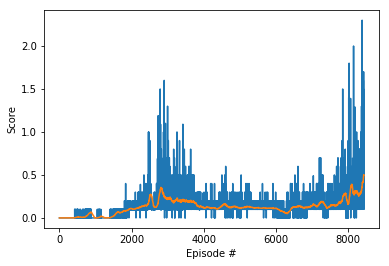

In [7]:
import matplotlib.pyplot as plt 
import pandas as pd

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), pd.Series(scores).rolling(100,1).mean())
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('tennis_rewards.png')
plt.show()

When finished, we close the environment!

In [8]:
env.close()